In [ ]:
import pathlib
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
work_path1 = pathlib.Path.cwd()

data_path1 = Path(work_path1, 'data_one_hot.csv')
train_data = pd.read_csv(data_path1)
train_data.shape

(307511, 224)

In [ ]:
train_data = train_data.drop(columns = ['SK_ID_CURR'])

In [ ]:
test_data_null = train_data['TARGET']
test_data_null.shape

(307511,)

In [ ]:
test_features = ['TARGET']
train_features = [item for item in train_data.columns if item not in test_features]
train_data_null = train_data[train_features]
train_data_null

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,1,0,0,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,1,0,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,1,0,0,1,0,1,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,1,0,0,1,0,0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,1,0,1,0,0,0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0,0,0,0,1,0,1,0,0,1
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,0,0,1,0,0,1,0,0,1
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train_null, X_test_null, y_train_null, y_test_null = train_test_split(
    train_data_null, test_data_null, random_state=29
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

model.fit(X_train_null, y_train_null)

y_pred = model.predict(X_test_null)

from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_null, y_pred)))

Model accuracy score with 10 decision-trees : 0.9200


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score

print('F1 score:', f1_score(y_test_null, y_pred))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred))
print('precision_score:', precision_score(y_test_null, y_pred))

F1 score: 0.0009748172217709179
roc_auc_score: 0.5002297637669285
precision_score: 0.6


In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores = feature_scores[:20]

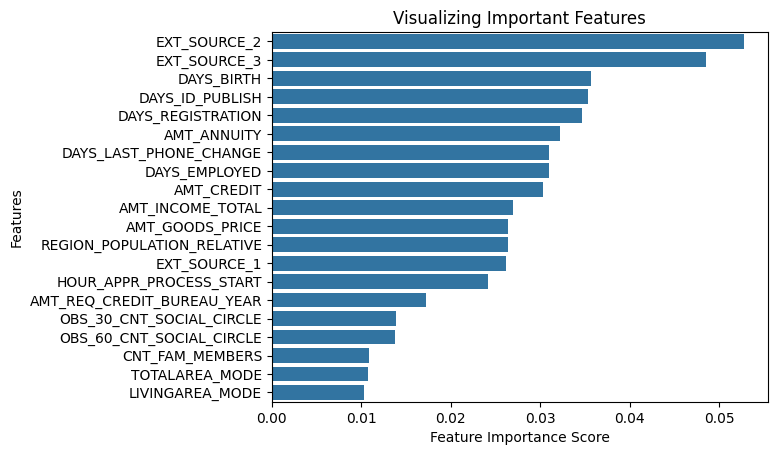

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

**100 trees**

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=50, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train_null, y_train_null)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test_null)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_null, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9200


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score

print('F1 score:', f1_score(y_test_null, y_pred))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred))
print('precision_score:', precision_score(y_test_null, y_pred))

F1 score: 0.0009748172217709179
roc_auc_score: 0.5002297637669285
precision_score: 0.6


In [ ]:
feature_scores_100 = pd.Series(rfc_100.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores_100 = feature_scores_100[:20]

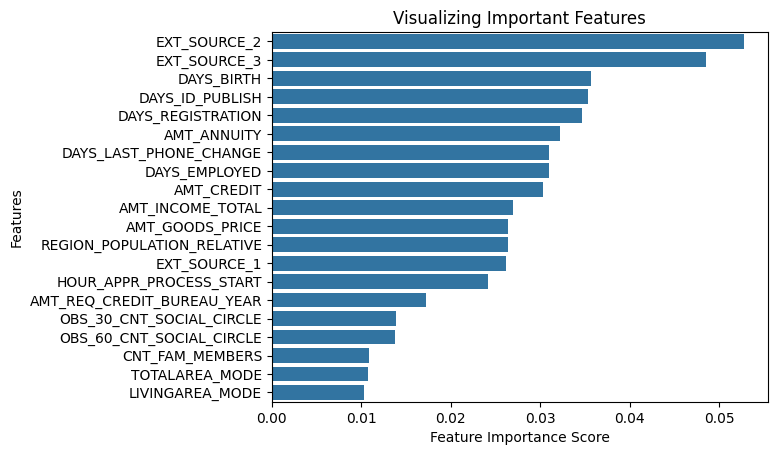

In [ ]:

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_null, y_train_null)

y_pred_xgb = model_xgb.predict(X_test_null)

accuracy = accuracy_score(y_test_null, y_pred_xgb) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  91.93007102161866


In [ ]:
print('F1 score:', f1_score(y_test_null, y_pred_xgb))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred_xgb))
print('precision_score:', precision_score(y_test_null, y_pred_xgb))

F1 score: 0.060000000000000005
roc_auc_score: 0.5143160882915242
precision_score: 0.44


In [ ]:
feature_scores_xgb = pd.Series(model_xgb.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores_xgb = feature_scores_xgb[:20]

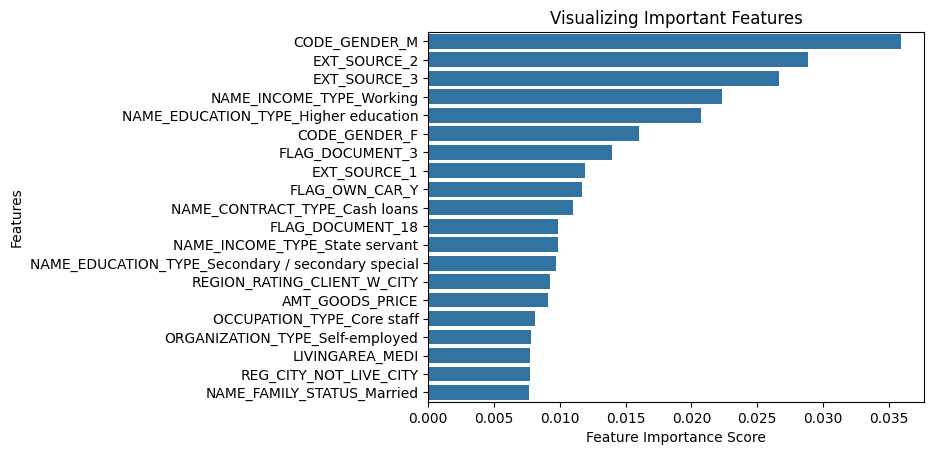

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores_xgb, y=feature_scores_xgb.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_null, y_train_null)

y_pred_lr = lr_clf.predict(X_test_null)

accuracy = accuracy_score(y_test_null, y_pred_lr) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  91.99771065844585


In [ ]:
print('F1 score:', f1_score(y_test_null, y_pred_xgb))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred_xgb))
print('precision_score:', precision_score(y_test_null, y_pred_xgb))

F1 score: 0.060000000000000005
roc_auc_score: 0.5143160882915242
precision_score: 0.44


In [ ]:
feature_scores_xgb = pd.Series(model_xgb.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores_xgb = feature_scores_xgb[:20]

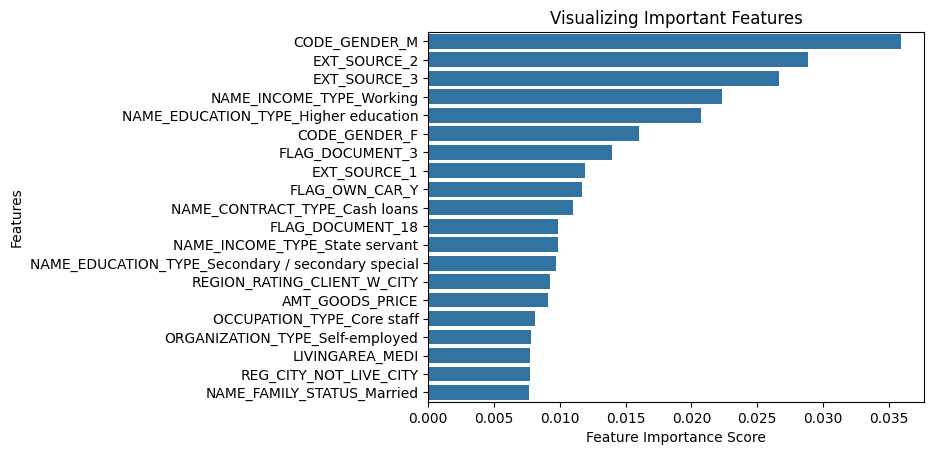

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores_xgb, y=feature_scores_xgb.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()